# Gemini types
- Ultra: The larges and most capabel model
- Pro: The best model for scaling
- Nano: 1.8 and 3.2B parameters, the most efficient model for on-device

Models use transformer tech
Accuracy is increased when the model increases, so Ultra is better than Nano.

# Gemini prompts and templates

In [1]:
!pip install langchain-google-genai

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/760.0 kB ? eta -:--:--
   --------------------------- ------------ 524.3/760.0 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 760.0/760.0 kB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
    --------------------------------------- 0.3/12.3 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.3 MB 2.8 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/12.3 MB 3.1 MB/s eta 0:00:04
   ------- -------------------------------- 2.4/12.3 MB 3.0 MB/s eta 0:00:04
   --------- ------------------------------ 2.9/12.3 MB 3.0 MB/s eta 0:00:04
   ----------- ---------------------------- 3.7/12.3 MB 3.1 MB/s eta 0:00:03
   ------------- -------------------------- 4.2/12.3 MB 3.0 MB/s eta 0:00:03
   ---------------- ----------------------- 5.0/12.3 MB 3.1 MB/s eta 0:00:03
   ---------

In [3]:
!pip install --upgrade -q langchain-google-genai

In [5]:
!pip show langchain-google-genai

Name: langchain-google-genai
Version: 2.0.1
Summary: An integration package connecting Google's genai package and LangChain
Home-page: https://github.com/langchain-ai/langchain-google
Author: 
Author-email: 
License: MIT
Location: C:\Users\Vagner Machado\AppData\Roaming\Python\Python312\site-packages
Requires: google-generativeai, langchain-core, pydantic
Required-by: 


In [4]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [5]:
import getpass
import os
if 'GOOGLE_API_KEY' not in os.environ:
    os.environ['GOOGLE_API_KEY'] = getpass.getpass("Provide your google api key")
else:
    print("API key loaded from .env file")


API key loaded from .env file


In [12]:
import google.generativeai as genai
for model in genai.list_models():
    print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/embedding-001
models/text-embedding-004
models/aqa


In [13]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", temperature=0.9)
response = llm.invoke("Write one paragraph about a society living in mars in the year 2039")
print(response.content)

The dusty red plains of Mars shimmered under the pale light of two suns. Above, the Martian sky, a canvas of lavender and orange, was dotted with the sleek, silver domes that housed the Martian colony. Within these domes, a bustling society had taken root. Children played in simulated parks, scientists toiled in laboratories bathed in the sterile glow of hydroponic farms, and families gathered for meals, their faces illuminated by the warm glow of holographic screens. Though the air was thin and the gravity weak, a sense of belonging had blossomed in the hearts of these pioneers. This was their home now, a testament to the ingenuity of humanity and the enduring human spirit, a place where they were building a new future on the surface of an alien world. 



In [20]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

prompt = PromptTemplate.from_template("You are a expert content creator. Write a tweet about {topic}")
chain = LLMChain(llm = llm, prompt = prompt, verbose = True)
topic = "Why will AI revolutionize the world"
response = chain.invoke(input=topic)
print(response["topic"])
print()
print(response["text"])

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


Prompt after formatting:
You are a expert content creator. Write a tweet about Why will AI revolutionize the world

> Finished chain.
Why will AI revolutionize the world

AI isn't just a buzzword, it's a revolution in the making! 🚀 From personalized healthcare to smarter cities, AI is poised to transform every aspect of our lives.  #AI #FutureTech #Innovation 



# System Prompt and Streaming

In [37]:
from langchain_core.messages import HumanMessage, SystemMessage
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", temperature=1.0)
messages = [
    (
        "system",
        "You are a helpful poet who is an expert at writing Sonnets. Write a sonnet based on human input",
    ),
    ("human", "sunset in the outumn")
]
llm.invoke(messages)

AIMessage(content="The sun, a fiery orb, descends the west,\nA crimson blush upon the fading sky,\nWhere clouds like painted brushstrokes, gently rest,\nAnd shadows lengthen, as the day bids goodbye. \nThe air grows crisp, a whisper of the breeze,\nCarries the scent of leaves, both brown and gold,\nA melancholy song, the wind appease,\nAs nature's beauty, in its prime, unfolds. \nThe trees, once vibrant, now begin to shed,\nTheir golden garments, on the earth below,\nA tapestry of hues, a vibrant thread,\nWhere life and death, in silent harmony, flow.\nIn autumn's embrace, a bittersweet farewell,\nAs day surrenders, to the night's dark spell. \n", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category'

In [8]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", temperature=1.0)
messages = [
    (
        "system",
        "You are a general doctor who analyzed symptoms and gives suggestions on what pacient should do.",
    ),
    (
        "human", 
        "I am feeling tired through the day even though i eat healty and exercise three times a week. What should i do to improve my health? "
    )
]
llm.invoke(messages[0])

AIMessage(content='Please tell me about your symptoms. Be as specific as possible. For example:\n\n* **What is the nature of your symptoms?** (e.g., pain, fever, cough, rash, fatigue)\n* **Where are you experiencing these symptoms?** (e.g., head, chest, stomach, legs)\n* **When did the symptoms start?**\n* **How long have you had the symptoms?**\n* **Have you had any other symptoms?**\n* **Are you taking any medications?**\n* **Have you had any recent illnesses or injuries?**\n* **Are you concerned about anything specific?**\n\nThe more information you provide, the better I can understand your situation and offer relevant advice.\n\n**Please note:** I am not a real doctor, and this conversation is for informational purposes only.  I cannot provide medical advice. If you are experiencing any serious symptoms, please seek immediate medical attention from a qualified healthcare professional. \n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratin

# Streaming

In [9]:
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", temperature=1.0)
prompt="Write a scientific paper outlining the mathematical foundation of our universe"
response = llm.invoke(prompt)

In [ ]:
## Below will only print when all the content is produced

In [11]:
print(response.content)

## The Mathematical Tapestry of the Universe: Exploring the Foundation of Reality

**Abstract:** This paper explores the profound connection between mathematics and the universe, examining the mathematical framework that underpins the physical laws governing our reality. We delve into the fundamental mathematical structures, such as geometry, topology, and group theory, that provide the building blocks for describing physical phenomena. The paper further investigates the role of symmetry and invariance principles in shaping the universe, highlighting the elegance and power of mathematical abstraction in capturing the essence of reality. We conclude by discussing the limitations of current mathematical frameworks and the potential for future breakthroughs in understanding the mathematical foundation of our universe.

**Introduction:**

Since the dawn of civilization, humanity has sought to understand the universe and our place within it. The scientific revolution ushered in a new era of

In [ ]:
## Below will print chunks as they get created

In [14]:
for chunk in llm.stream(prompt):
    print(chunk.content, end="")
    print("\n" + ("-"  * 100))


## The Mathematical
----------------------------------------------------------------------------------------------------

 Tapestry of the Universe: A Framework for Understanding Our Reality

**Abstract:**
----------------------------------------------------------------------------------------------------

 This paper explores the profound relationship between mathematics and the universe, arguing that mathematics serves as a
----------------------------------------------------------------------------------------------------

 fundamental language describing the fabric of reality. We delve into key mathematical frameworks like geometry, topology, and group theory, demonstrating their application in understanding various aspects of the universe, from
----------------------------------------------------------------------------------------------------

 its vast scale to its intricate quantum realm. We also examine the role of mathematical constants and their implications for the existen

# Multimodal AI with Gemini

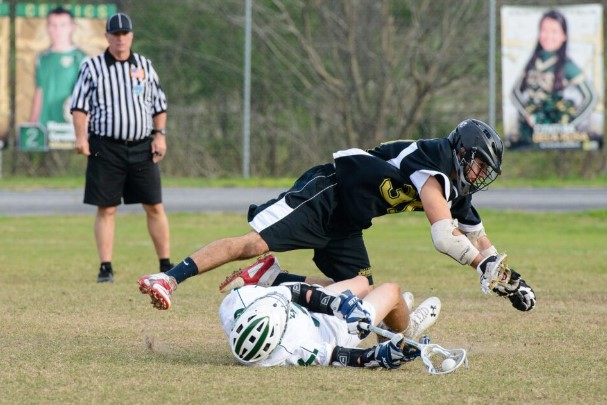

In [19]:
## Lets get a photo

from IPython.display import Image, display
display(Image(filename="sampleImage.jpg"))

In [21]:
import base64
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")
byte_image = encode_image("sampleImage.jpg")

In [24]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [27]:
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", temperature=0.2)
#low temp close to 0 => focused and more precise; closer to 1.0 then more creative
prompt = "What is in this image?"
message = HumanMessage(
   content= [
        {
        "type" : "text",
        "text" : prompt
        },
        {
            "type":"image_url",
            "image_url" : {"url" : f'data:image/jpeg;base64,{byte_image}'}
        }
    ]
)

response = llm.invoke([message])

In [29]:
print(response.content)

The image shows a lacrosse game. A player in black and gold is diving to the ground to try and get the ball, while another player in white and green is trying to stop him. A referee is standing in the background. There is a white lacrosse ball on the ground.


In [52]:
def ask_gemini(prompt, image_path, model="gemini-1.5-flash"):
    byte_image = encode_image(image_path)
    llm = ChatGoogleGenerativeAI(model=model)
    message = HumanMessage(
       content= [
            {
            "type" : "text",
            "text" : prompt
            },
            {
                "type":"image_url",
                "image_url" : {"url" : f'data:image/jpeg;base64,{byte_image}'}
            }
        ]
    )
    response= llm.invoke([message])
    return response

In [36]:
response = ask_gemini("How many humans are there in this image?", "sampleImage.jpg")

In [37]:
print(response.content)

There are three humans in the image.


In [39]:
response = ask_gemini("Other than 3 humans, are there further depictions of humans? If so describe", "sampleImage.jpg")
print(response.content)

Yes, there are two additional depictions of humans in the image:

- A young boy wearing a green and white jersey, visible in the background through a window.
- A young woman wearing a green and white jersey, visible in the background through a window. 



In [43]:
response = ask_gemini("What season of the year appears to be in the image", "sampleImage.jpg")
print(response.content)

It is difficult to tell the exact season based on the image alone. However, the players are wearing long sleeves, suggesting a cooler season like fall or spring. The grass is also green, which is typical for spring and summer. Without more information, it's impossible to say for sure. 



In [44]:
!pip install requests

Defaulting to user installation because normal site-packages is not writeable


In [45]:
import requests
image_url="https://photographylife.com/wp-content/uploads/2020/01/iPhone-11-Pro-Image-Sample-71.jpg"
content = requests.get(image_url).content

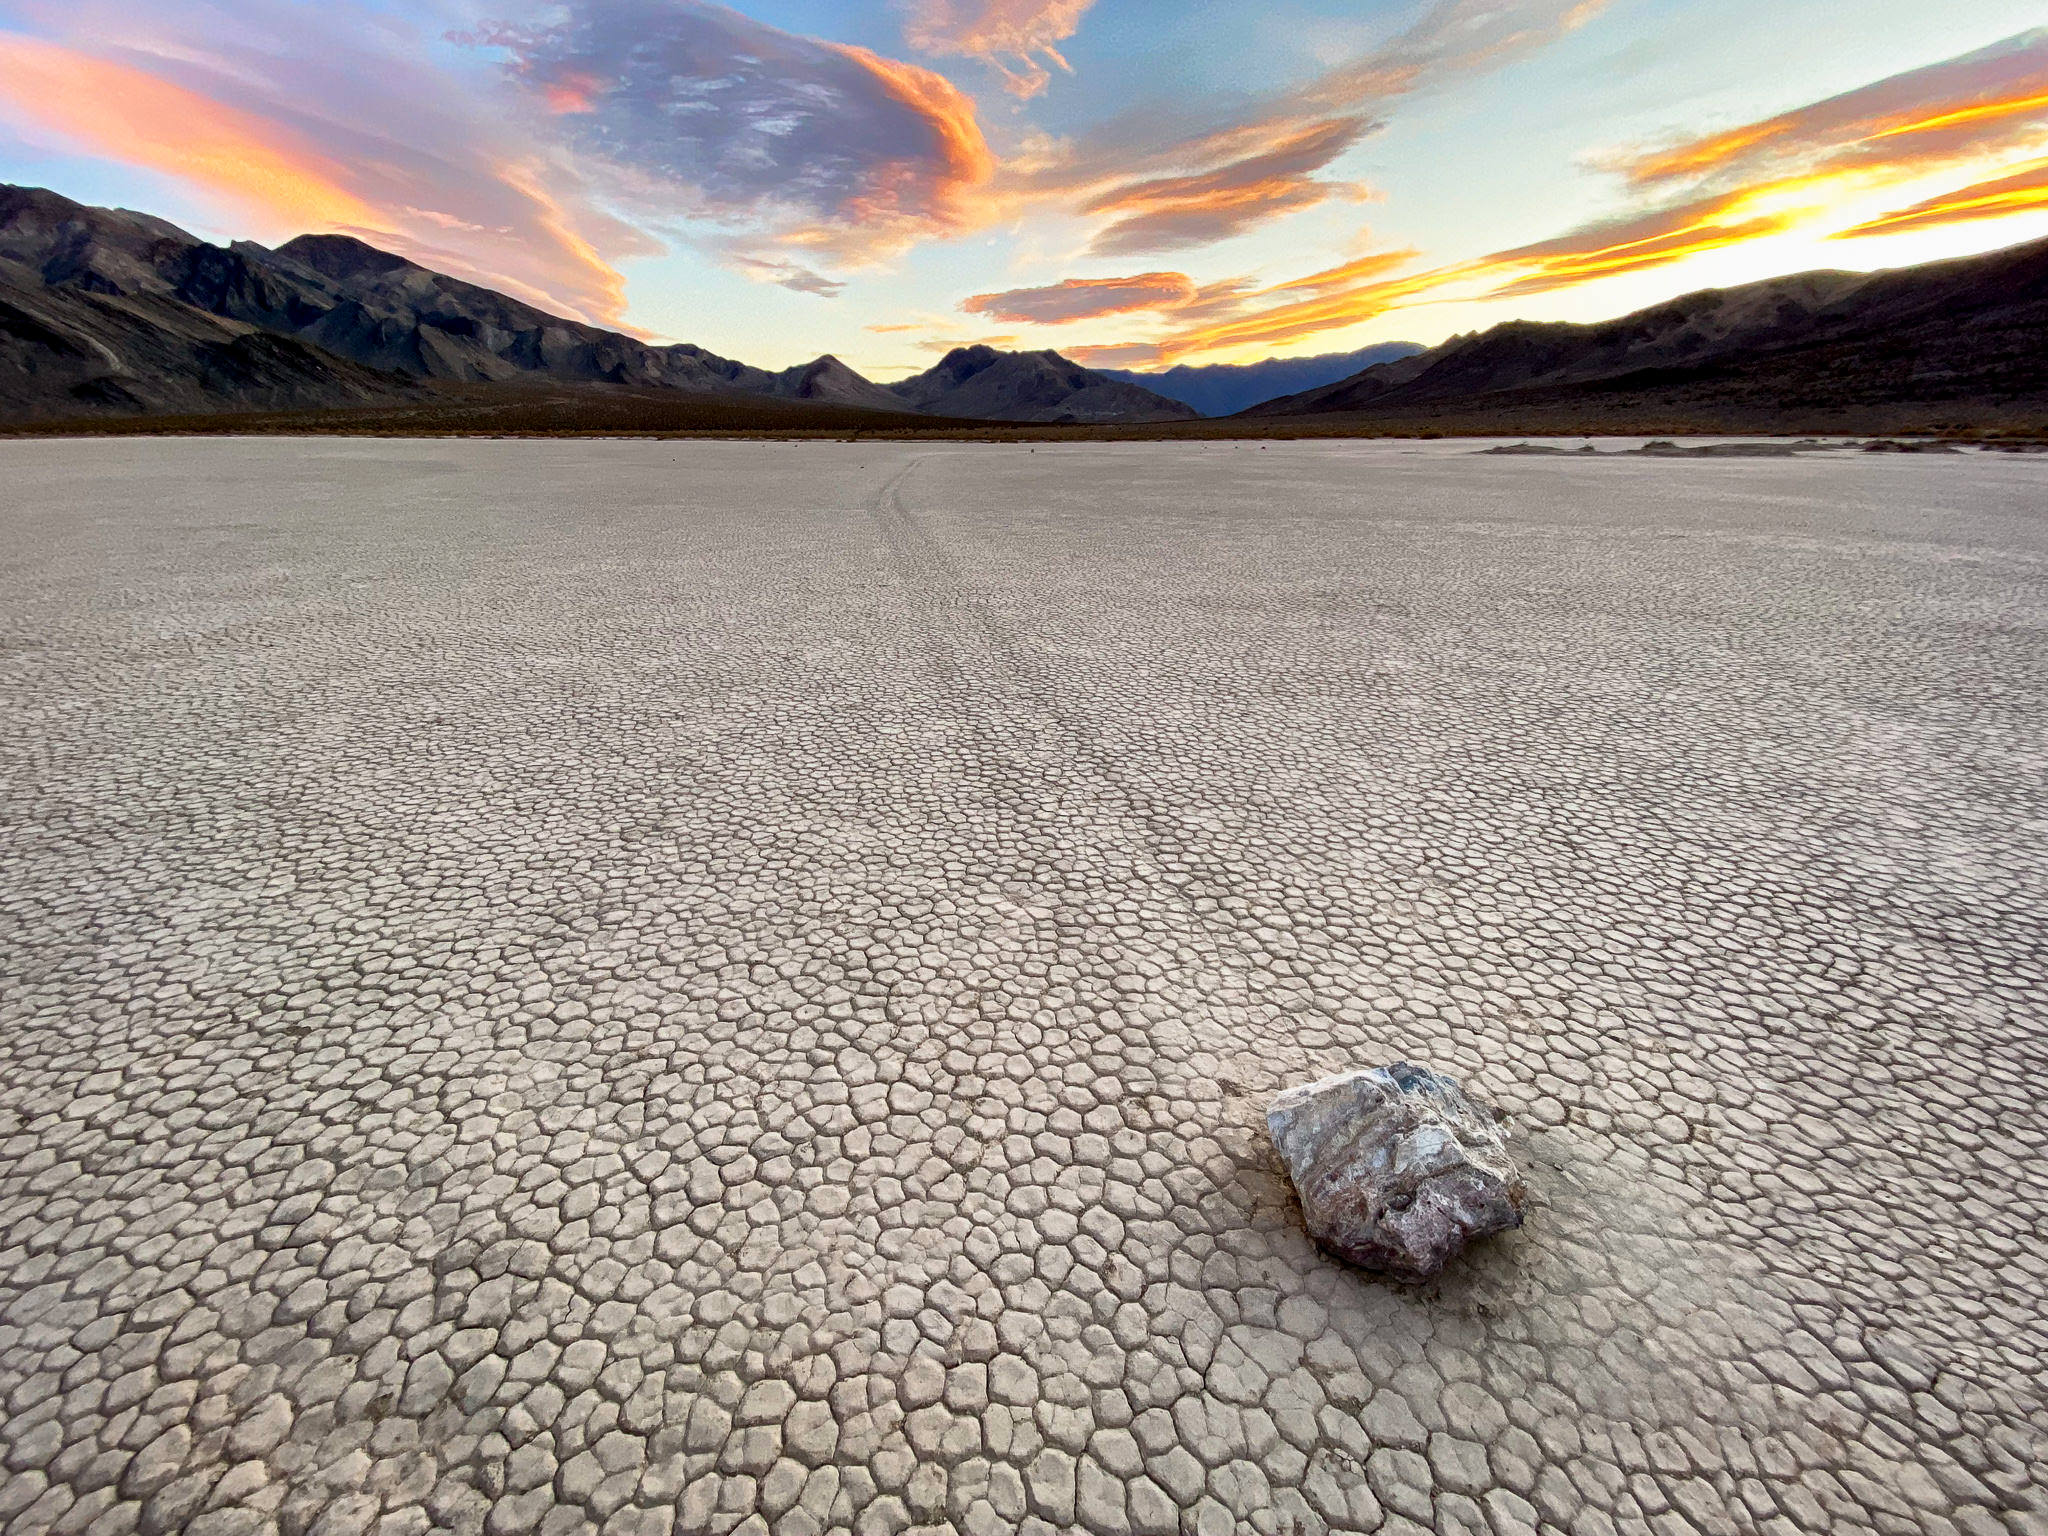

In [47]:
with open("onlineImageReq.jpg","wb") as file:
    file.write(content)

display(Image(filename="onlineImageReq.jpg"))
    

In [53]:
r = ask_gemini("Describe this image with the most detail possible", "onlineImageReq.jpg")
print(r.content)

The image shows a vast, cracked, dry, light-colored earth. The surface is covered in a pattern of hexagonal shapes, resembling a honeycomb. In the distance, a chain of mountains rises up against a bright blue sky, with clouds painted in shades of orange and pink. The sun is setting, casting a warm glow over the scene. A single, large, gray rock sits in the foreground, adding a touch of texture and scale to the otherwise flat landscape. The image evokes a sense of vastness, solitude, and the raw beauty of nature.
